In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load data (replace 'path_to_file.csv' with your file path)
# If the file does not exist, create a sample dataset
try:
	df = pd.read_csv('path_to_file.csv')
except FileNotFoundError:
	print("File not found. Creating a sample dataset.")
	df = pd.DataFrame({
		'kills': [2, 5, 1, 8, 4],
		'win_place': [10, 5, 20, 1, 15],
		'damage_dealt': [100, 300, 50, 500, 200]
	})

df.head()


File not found. Creating a sample dataset.


,kills,win_place,damage_dealt
0,2,10,100
1,5,5,300
2,1,20,50
3,8,1,500
4,4,15,200


In [3]:
# Information about the data
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   kills         5 non-null      int64
 1   win_place     5 non-null      int64
 2   damage_dealt  5 non-null      int64
dtypes: int64(3)
memory usage: 252.0 bytes


kills           0
win_place       0
damage_dealt    0
dtype: int64

In [4]:
# Descriptive statistics
df.describe()


,kills,win_place,damage_dealt
count,5.000000,5.000000,5.000000
mean,4.000000,10.200000,230.000000
std,2.738613,7.596052,178.885438
min,1.000000,1.000000,50.000000
25%,2.000000,5.000000,100.000000
50%,4.000000,10.000000,200.000000
75%,5.000000,15.000000,300.000000
max,8.000000,20.000000,500.000000


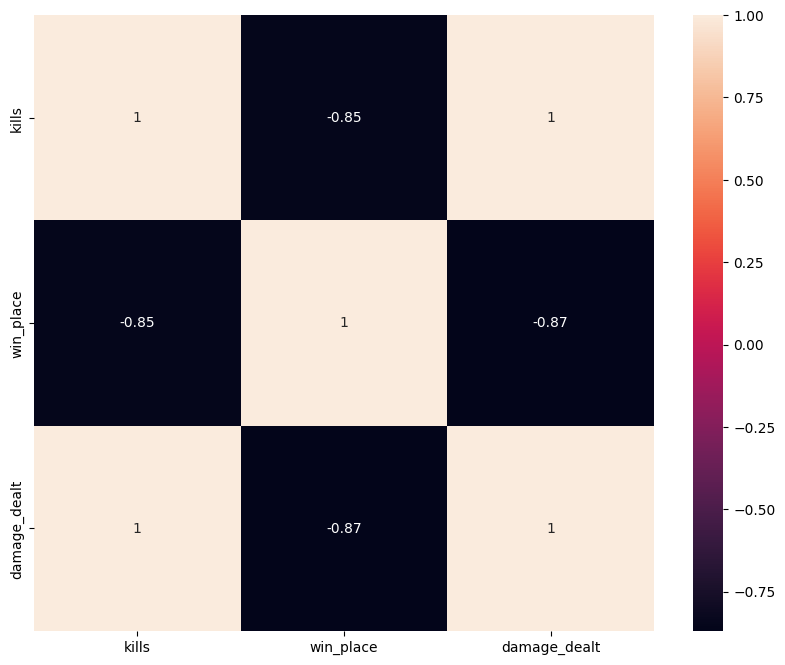

In [5]:
# Correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [6]:
# Dropping missing values
df.dropna(inplace=True)
# Encoding categorical variables (if needed)
df = pd.get_dummies(df)


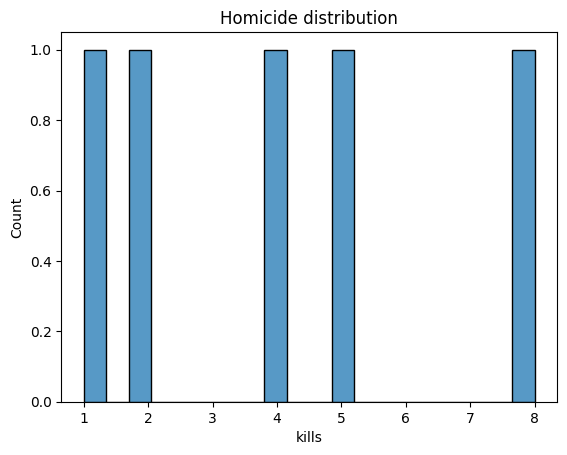

In [7]:
# Distribution of kills
sns.histplot(df['kills'], bins=20)
plt.title('Homicide distribution')
plt.show()


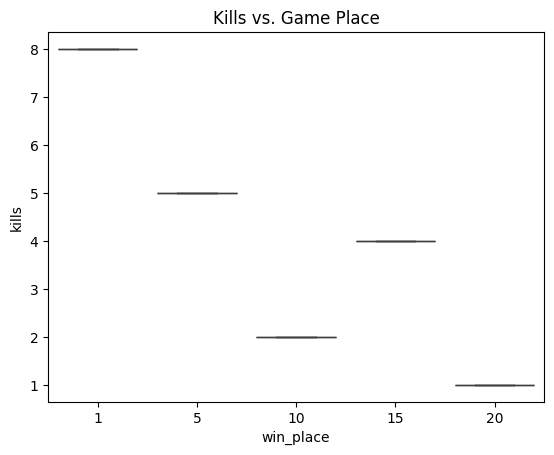

In [8]:
# Kills vs placement in the game
sns.boxplot(x='win_place', y='kills', data=df)
plt.title('Kills vs. Game Place')
plt.show()


In [9]:
# Selected features
features = df[['kills', 'win_place', 'damage_dealt']]
# Clustering
kmeans = KMeans(n_clusters=3)
df['player_type'] = kmeans.fit_predict(features)


c:\Users\hubik\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Nie można odnaleźć określonego pliku
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\hubik\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\hubik\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hubik\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File 

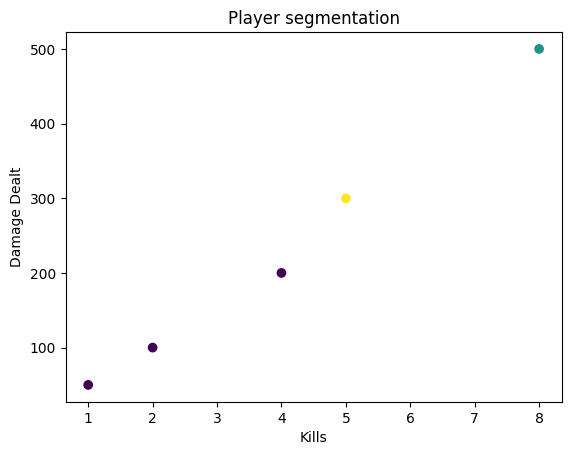

In [10]:
# Cluster visualization
plt.scatter(df['kills'], df['damage_dealt'], c=df['player_type'])
plt.xlabel('Kills')
plt.ylabel('Damage Dealt')
plt.title('Player segmentation')
plt.show()


In [11]:
# Data preparation
X = df[['kills', 'damage_dealt']]
y = df['win_place'] < 10  #1 if top 10, 0 otherwise
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       0.0
        True       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



c:\Users\hubik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hubik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hubik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

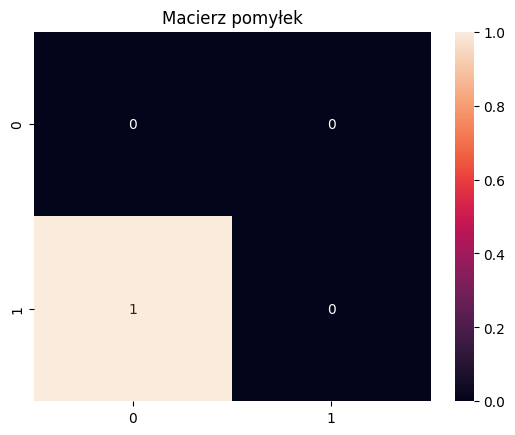

In [ ]:
# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title('Error Matrix')
plt.show()


# Summary
Player telemetry data analysis project:
- Initial data exploration and cleaning
- Player behavior analysis
- Player segmentation using clustering method
- Predicting top 10 placement based on features
